## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [22]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [23]:
# Reading data from remote link
path="http://bit.ly/w-data"
dataset=pd.read_csv(path)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### **Visualization between Hours and Scores**#

**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

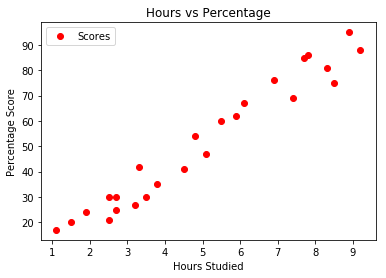

In [26]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

In [27]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [29]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### **Predict the test set**

In [30]:
y_pred=regressor.predict(X_test)

### **Visualization of Predicted Line**

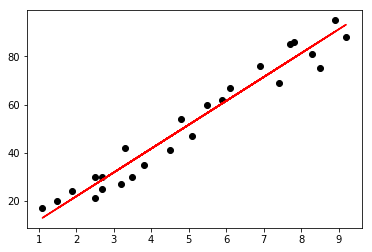

In [31]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='black')
plt.plot(X, line,color='red');
plt.show()

In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Due to less data in trining set, Predicted set and Actual set have difference in them**

### **Plotting Training Data**

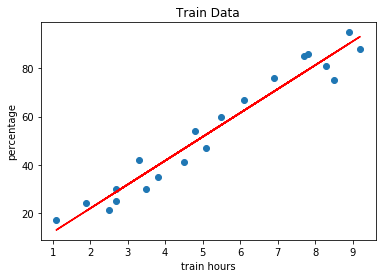

In [38]:
plt.scatter(X_train, y_train)
plt.title('Train Data')
plt.xlabel('train hours')
plt.ylabel('percentage')
plt.plot(X_train, regressor.coef_*X_train+regressor.intercept_, color='red')
plt.show()

### **Plotting Testing Data**

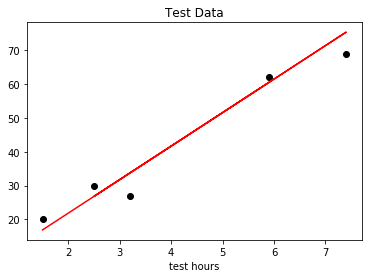

In [39]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, regressor.coef_*X_test+regressor.intercept_, color='red')
plt.title('Test Data')
plt.xlabel('test hours')
plt.show()

### **Testing with given data**

In [13]:
n=float(input())
hours=np.array([n])
hours=hours.reshape(-1,1)
predicted=regressor.predict(hours)
print('Given data {}'.format(hours))
print('Predicted Scores {}'.format(predicted[0]))

9.25
Given data [[9.25]]
Predicted Scores 93.69173248737538


### **Evaluating the Algorithm**

In [14]:
from sklearn.metrics import mean_absolute_error

In [19]:
s=[0.2,0.1,0.01]
for i in s:
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=i, random_state=0) 
    regressor.fit(X_train, y_train)
    y_pred=regressor.predict(X_test)
    print('Mean Absolute Error(test size {}%):'.format(i), mean_absolute_error(y_test, y_pred))

Mean Absolute Error(test size 0.2%): 4.183859899002975
Mean Absolute Error(test size 0.1%): 5.3994503136120064
Mean Absolute Error(test size 0.01%): 3.2438322612862294


**According to this results Mean Absolute Error decreases when training set size increase**